<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Use-OpenCV" data-toc-modified-id="Use-OpenCV-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Use OpenCV</a></span></li><li><span><a href="#Saving-an-animation" data-toc-modified-id="Saving-an-animation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Saving an animation</a></span></li></ul></div>

In [2]:
%matplotlib inline

# Use OpenCV
Not working, saves unreadable avi file

In [8]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

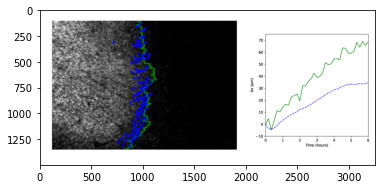

In [28]:
# Test loading an image
filename = "/Users/dang/Documents/Projects/Tabler_skull/Data_Adrian_cell_tracks/Image_with_plots_w_interface_and_tracks/Video1_png/Image_w_interface_tracks_and_plotsMaxProjected_Stitched_Blurred_190305_ML1_OsxGFP_Explant_Video_1_(0-12hr)_0036.png"
img = cv2.imread(filename)
#img.shape
# cv2.imshow('Example - Show image in window', img) <- not working, crashes kernel

plt.imshow(img)

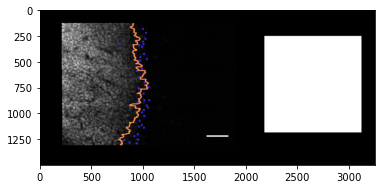

In [15]:
filename = '/Users/dang/Documents/Projects/Tabler_skull/Data_Adrian_cell_tracks/Image_with_plots_w_interface_and_tracks/Video1/Image_w_interface_tracks_and_plotsMaxProjected_Stitched_Blurred_190305_ML1_OsxGFP_Explant_Video_1_(0-12hr)_0000.tif'
#img=cv2.imread(os.path.join(image_folder, filename) )
plt.imshow(img)

https://stackoverflow.com/questions/44947505/how-to-make-a-movie-out-of-images-in-python

In [23]:
video_num = 3;
video_idx = video_num-1;

In [24]:
# Script to save a video
import cv2
import os

image_folder = '/Users/dang/Documents/Projects/Tabler_skull/Data_Adrian_cell_tracks/Image_with_plots_w_interface_and_tracks/Video{}/'.format(video_num)
video_save_folder = '/Users/dang/Documents/Projects/Tabler_skull/Data_Adrian_cell_tracks/Image_with_plots_w_interface_and_tracks'
video_name = 'Video_{}.avi'.format(video_num)

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
images.sort() # sort list of images alphanumerically

frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

fps = 3;
video = cv2.VideoWriter(os.path.join(video_save_folder, video_name), 0, fps, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()


# Saving an animation


This example showcases the same animations as `basic_example.py`, but instead
of displaying the animation to the user, it writes to files using a
MovieWriter instance.



In [1]:
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

# Fixing random state for reproducibility
np.random.seed(19680801)


# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

fig1 = plt.figure()

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=50, blit=True)
line_ani.save('lines.mp4', writer=writer)

fig2 = plt.figure()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))

im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
                                   blit=True)
im_ani.save('im.mp4', writer=writer)

/var/folders/8z/k5cyvf4j5kl0mzc9vn1gf_2h0000gq/T/ipykernel_5534/645187080.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))
